In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Phishing.csv")
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [7]:
df.shape

(11055, 31)

# Check for duplicates values

In [9]:
df.duplicated().sum()

5206

In [11]:
df.drop_duplicates(inplace = True) # Dropping duplicates

In [13]:
df.duplicated().sum()

0

In [15]:
df.shape

(5849, 31)

# Check for Null values

In [17]:
df.isnull().sum().sum() # No Null values

0

# Check if target is balanced or imbalanced

In [19]:
df["Result"].value_counts() #Class is not imbalanced as they are in ratio of approx 3:2

Result
-1    3019
 1    2830
Name: count, dtype: int64

In [162]:
# Check for SD to see if there is any columns with SD = 0. 

In [21]:
df.describe() # Looks like all the coloumns have fair bit of deviation which is good for model training

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000
mean,0.132843,-0.616003,0.720294,0.588648,0.718242,-0.760301,0.065823,0.149085,-0.305864,0.581809,0.677552,0.653616,0.120875,-0.138485,-0.146863,-0.584544,0.574970,0.678236,0.131817,0.723030,0.901864,0.564028,0.785604,0.021371,0.475124,0.233886,-0.423833,0.661823,0.347752,0.697042,-0.032313
std,0.991222,0.777323,0.693728,0.808459,0.695852,0.649627,0.802448,0.924473,0.952157,0.813395,0.735538,0.756891,0.992753,0.725940,0.769730,0.754880,0.818244,0.734907,0.338321,0.690876,0.432058,0.825826,0.618782,0.999857,0.879994,0.826010,0.905818,0.749725,0.579027,0.717091,0.999563
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
# Visualization of Data

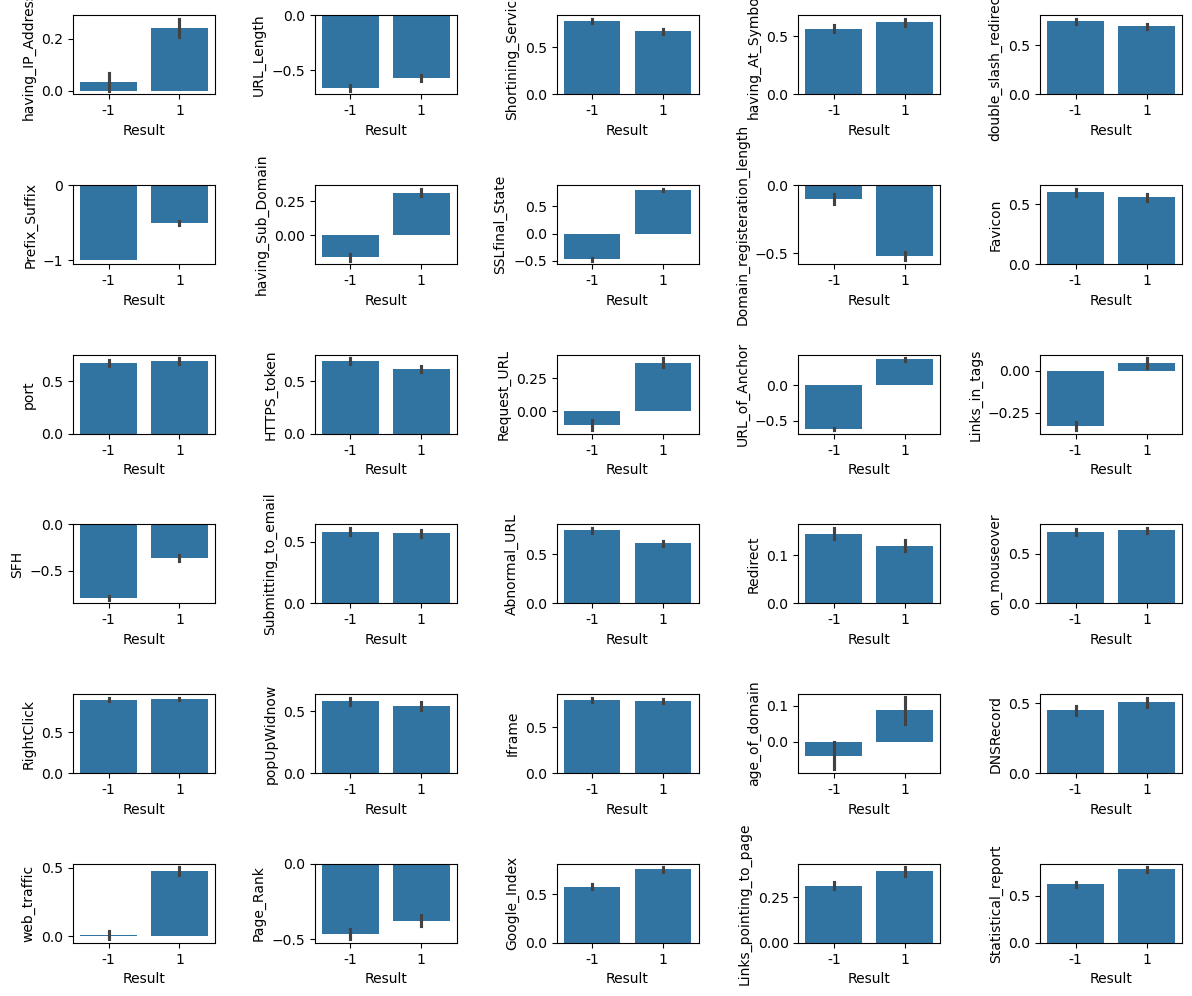

In [23]:
plt.figure(figsize=(12, 13))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(8,5,i+1)
    sns.barplot(df, y = col, x = "Result")
plt.tight_layout(pad=1.0, w_pad=2 , h_pad=3.0)
plt.show()

In [388]:
# Insight - Over all the classes (-1,1) are equally distribted amoung features barring 2 or 3 columns

# Lets find the corelation 

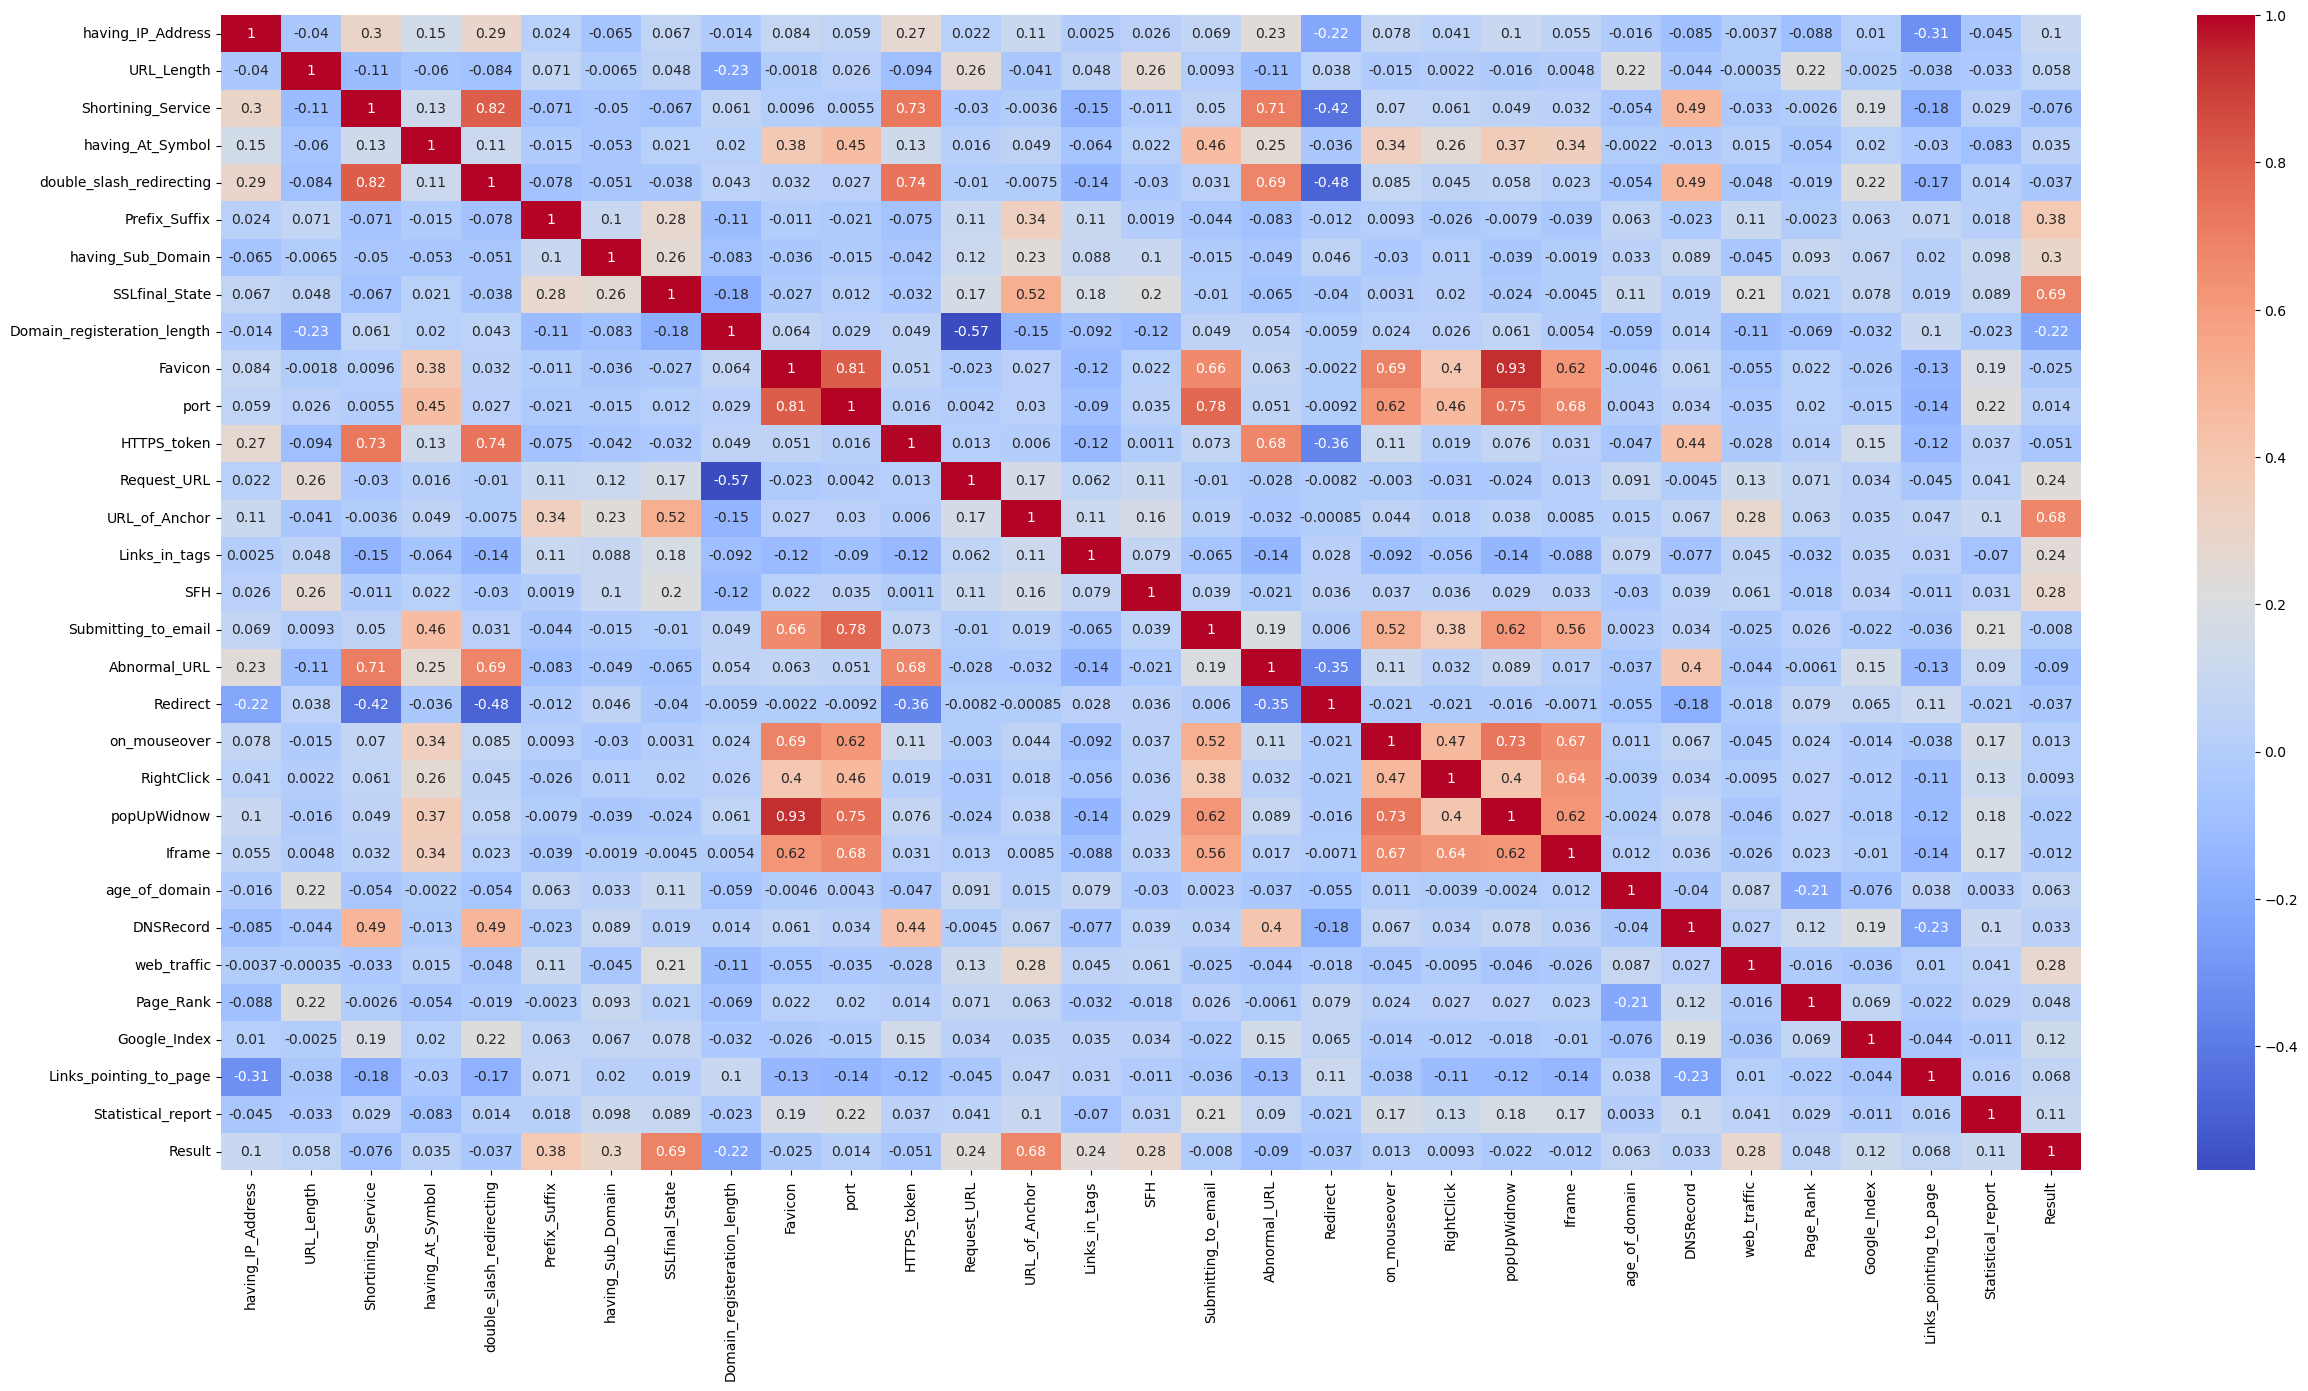

In [25]:
plt.figure(figsize=(30, 15))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",xticklabels='auto',yticklabels='auto')
plt.show()

# Lets get top 20 correlations

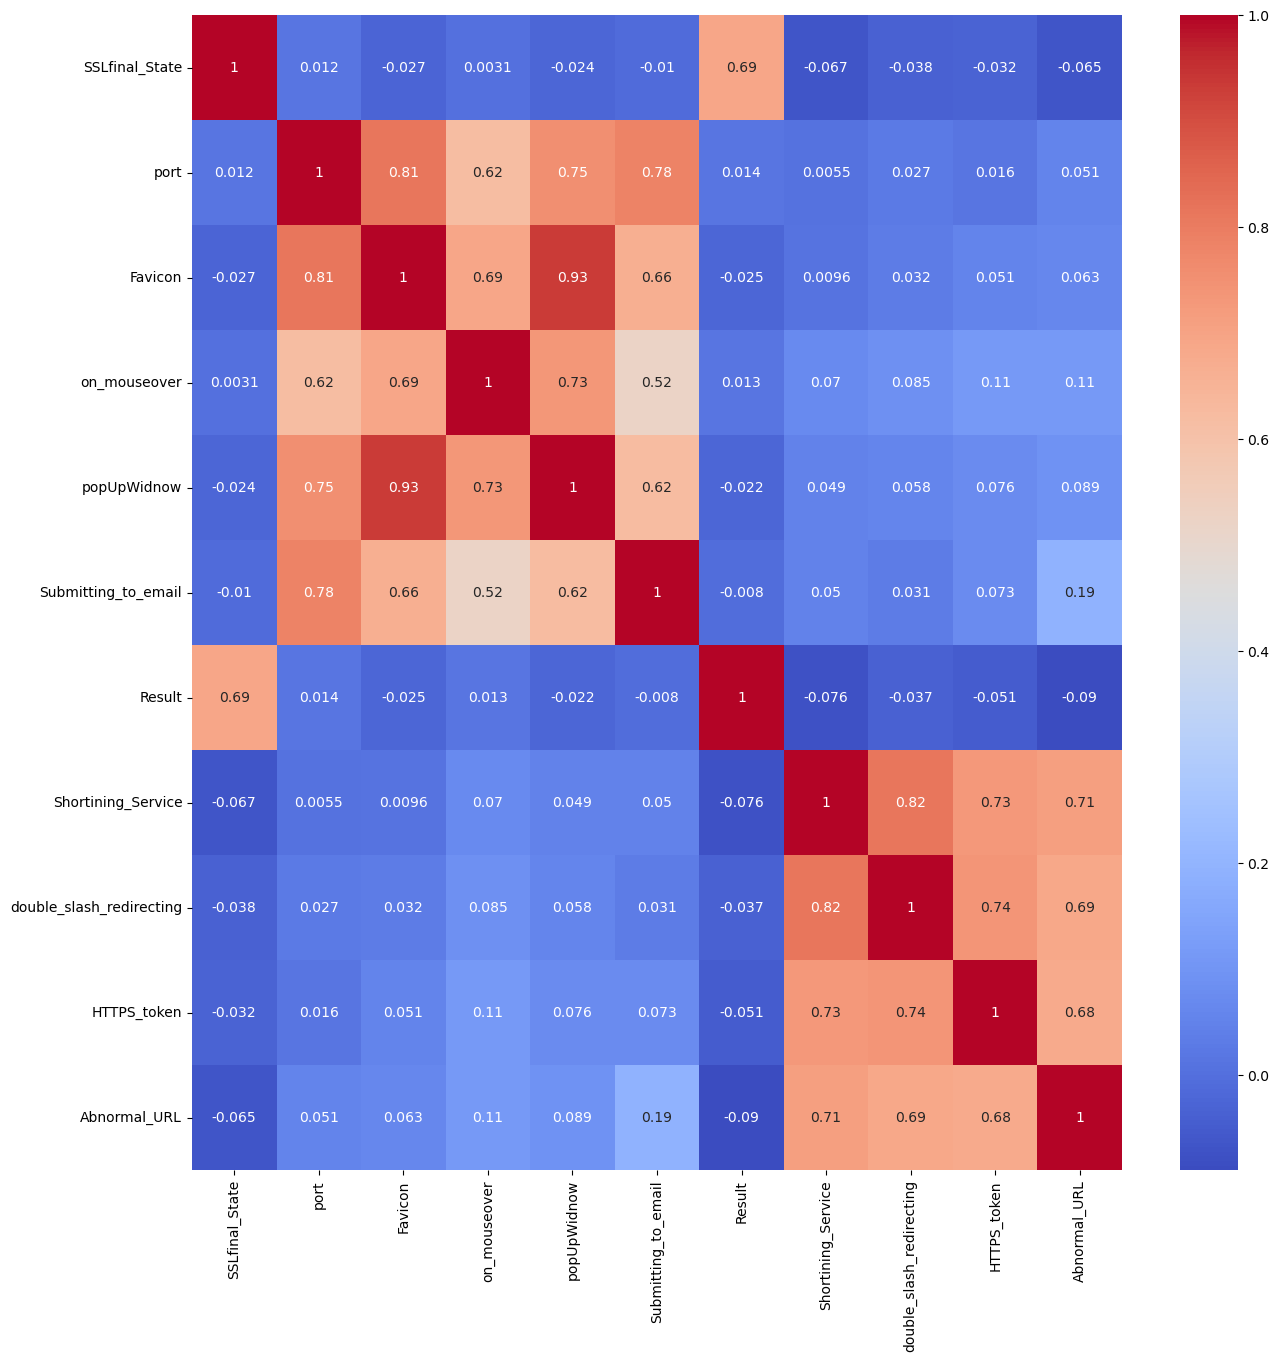

In [27]:
n = 20
correlations = df.corr().unstack().abs().sort_values(ascending=False)
top_correlations = correlations[correlations != 1].head(n)

# Extract corresponding columns
top_columns = list(set([col for pair in top_correlations.index for col in pair]))

# Plot heatmap for top correlated columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[top_columns].corr(), annot=True, cmap="coolwarm")
plt.show()

In [529]:
# Insight. Below columns are co-related. 
# We can keep any one columns among below pair (either Favicon or popUpWidnow ) to reduce the curse of dimensionality.
# Favicon                      popUpWidnow                    0.933145
# popUpWidnow                  Favicon                        0.933145
# double_slash_redirecting     Shortining_Service             0.815809
# Shortining_Service           double_slash_redirecting       0.815809
# Favicon                      port                           0.812657

# Split to x and Y

In [29]:
x = df.drop("Result", axis = 1)
y = df[[df.columns[-1]]]

In [31]:
y.replace({-1: 0}, inplace=True)

# Train test and split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 1)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4094, 30), (1755, 30), (4094, 1), (1755, 1))

In [ ]:
pip install dagshub

# Model Training

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [97]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [59]:
pip install dagshub

Note: you may need to restart the kernel to use updated packages.


In [61]:
import dagshub
dagshub.init(repo_owner='chetanfernandes',
             repo_name='End-to-End-ML-project-with-MLFlow',
             mlflow=True)

Accessing as ChetanFernandes

Initialized MLflow to track repo "chetanfernandes/End-to-End-ML-project-with-MLFlow"

Repository chetanfernandes/End-to-End-ML-project-with-MLFlow initialized!

In [63]:
import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

🏃 View run peaceful-bee-477 at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/0/runs/a40d35d90dae48099d47dddd1684bcc4
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/0


In [ ]:
Phising_experiment = mlflow.set_experiment("Phishing_1,1")

Scores [92.55189255 91.08669109 93.28449328 92.06349206 91.68704156]
Mean Score 0.9213472211027224
AUC Score 0.9222166654366905
Model Score 0.9222166654366905


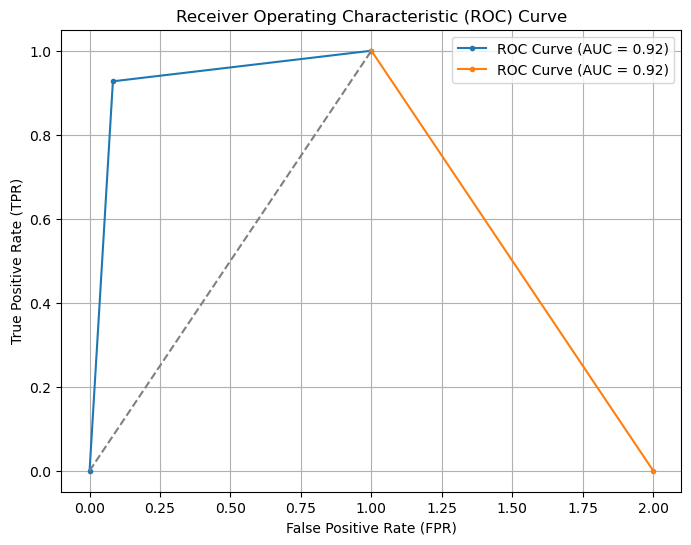

***********************************
🏃 View run LR at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/270e18198dee4972965481b0a9a4a994
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [93.52869353 93.04029304 94.26129426 94.13919414 93.15403423]
Mean Score 0.9362470183986076
AUC Score 0.9460814272882273
Model Score 0.9460814272882273


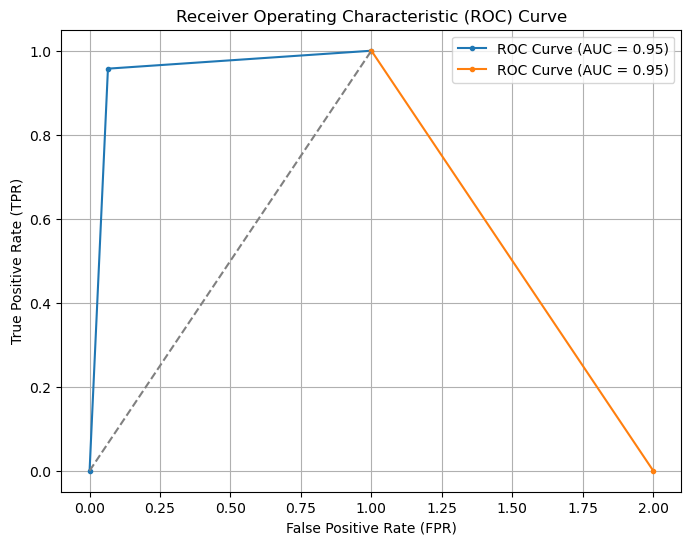

***********************************
🏃 View run SVC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/7086742953e0402e84340bea441282a7
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [92.18559219 91.20879121 93.16239316 92.7960928  91.68704156]
Mean Score 0.9220798218353231
AUC Score 0.9232746837707392
Model Score 0.9232746837707392


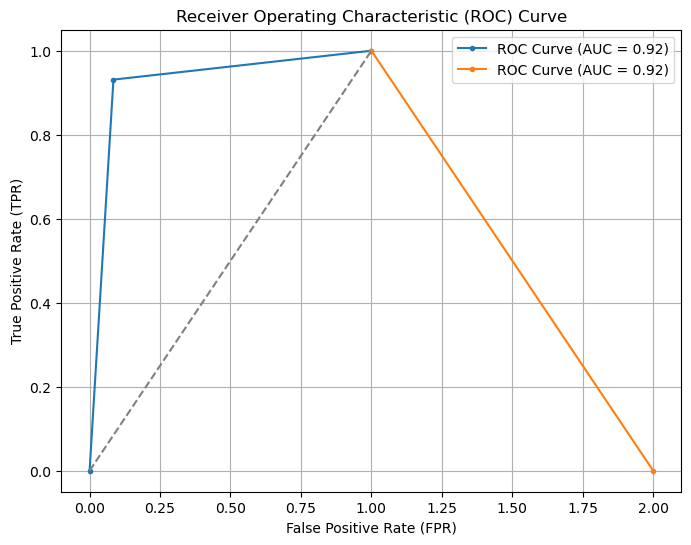

***********************************
🏃 View run LSVC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/5117ee54b84548059f21fc7b14d910ad
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [94.87179487 94.99389499 95.11599512 94.01709402 93.03178484]
Mean Score 0.9440611276797096
AUC Score 0.9921510802414956
Model Score 0.9921510802414956


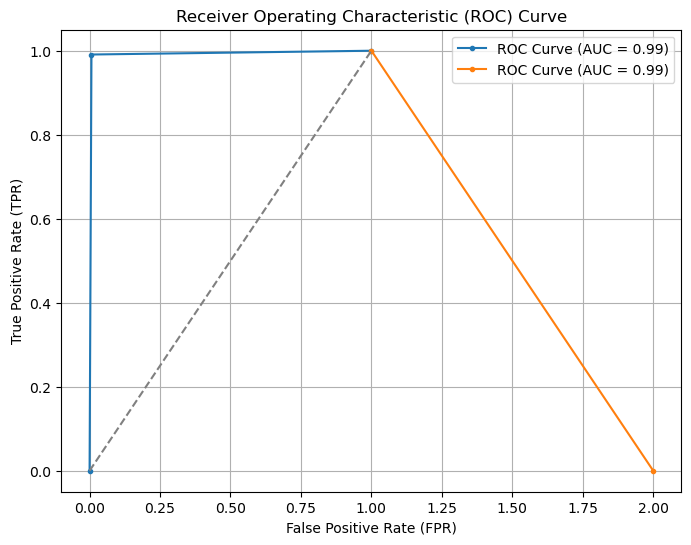

***********************************
🏃 View run RFC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/fa242b50186e448eb4a9b7461beecc38
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [93.52869353 92.18559219 93.16239316 94.01709402 93.39853301]
Mean Score 0.9325846118022157
AUC Score 0.9357479556721365
Model Score 0.9357479556721365


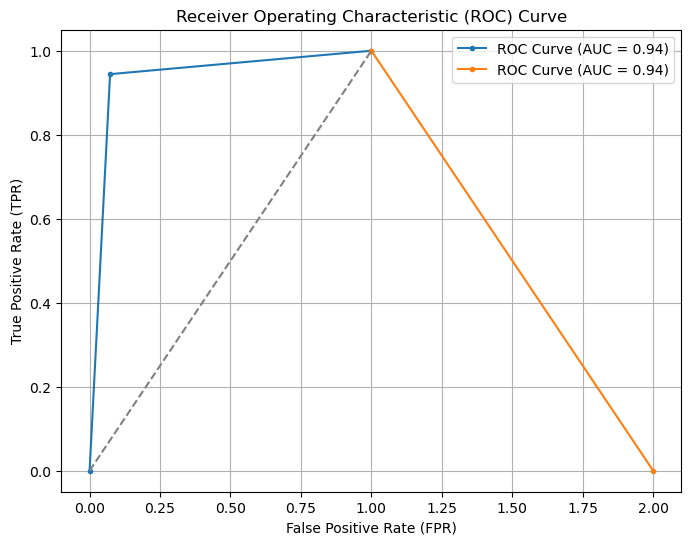

***********************************
🏃 View run ABC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/7aa4bd6f5cf5430698a6fdf4655dd5f5
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [95.11599512 94.01709402 95.72649573 93.89499389 94.13202934]
Mean Score 0.9457732161888641
AUC Score 0.9527787072257875
Model Score 0.9527787072257875


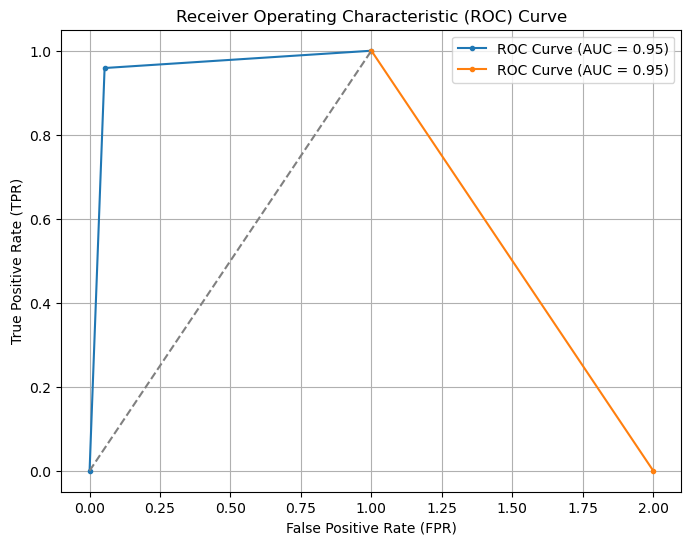

***********************************
🏃 View run GBC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/b6b6ed988c8f48e09b05c67e05d18690
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [95.6043956  95.48229548 94.99389499 94.38339438 94.00977995]
Mean Score 0.9489475208301613
AUC Score 0.9874999791023468
Model Score 0.9874999791023468


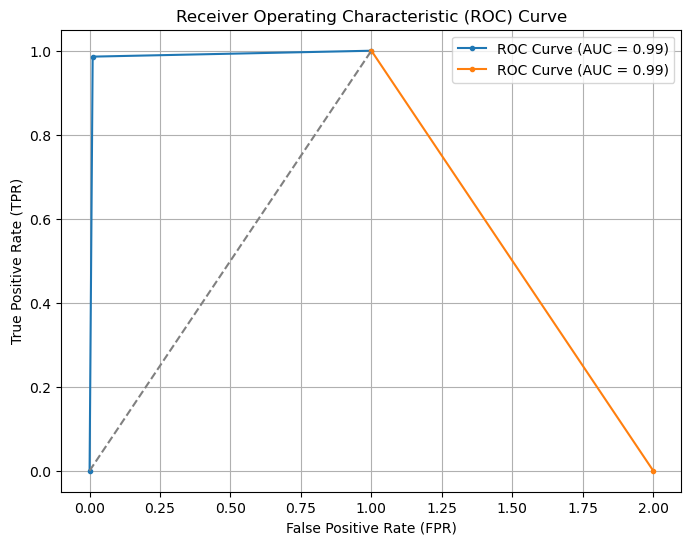

***********************************
🏃 View run XGBC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/398d4da61ca3404f82ce0045e06d9bed
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [92.7960928  93.16239316 92.42979243 91.6971917  91.19804401]
Mean Score 0.9225670281905
AUC Score 0.9919638372677047
Model Score 0.9919638372677047


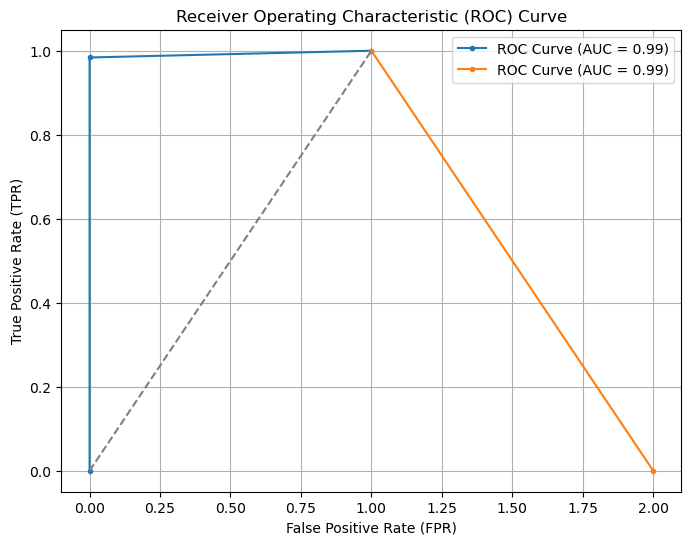

***********************************
🏃 View run DTC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/70898fa3b8bf410dbc34edcef2b5d5e2
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Scores [66.05616606 65.81196581 66.66666667 65.56776557 65.40342298]
Mean Score 0.6590119741708984
AUC Score 0.6489468896291036
Model Score 0.6489468896291036


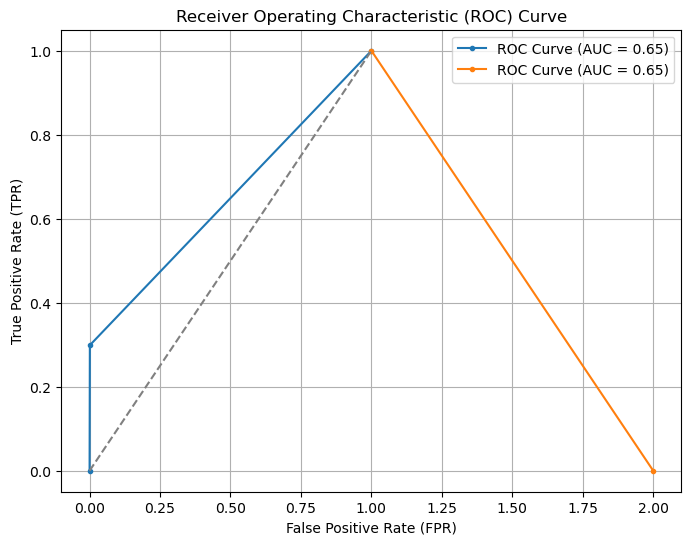

***********************************
🏃 View run GNB at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3/runs/448e6da5f3aa4f20a349084baf6fa234
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/3
Model with highest accuracy is -> 99.21510802414956. Model name is RFC


In [99]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train,y_pred)
    auc_score = roc_auc_score(y_train,y_pred)
    model_score = accuracy_score(y_train,y_pred)
    
    metrics = {"auc_score": auc_score, "Accuracy Score": model_score}

    #print(classification_report(y_train,y_pred))
    #print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    #print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    run_name = model_list[i]
    artifact_path = model_list[i]
    with mlflow.start_run(run_name=run_name) as run:
        # Log the parameters used for the model fit
        # mlflow.log_params(params)
    
        # Log the error metrics that were calculated during validation
        mlflow.log_metrics(metrics)
    
        # Log an instance of the trained model for later use
        model_info = mlflow.sklearn.log_model(sk_model= model, input_example=X_train, artifact_path=artifact_path)
        print("*"*35)
        
            
print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")

In [101]:
import mlflow
logged_model = 'runs:/448e6da5f3aa4f20a349084baf6fa234/GNB'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

mlflow.pyfunc.loaded_model:
  artifact_path: GNB
  flavor: mlflow.sklearn
  run_id: 448e6da5f3aa4f20a349084baf6fa234

